# Самостоятельная работа "Сравнение регрессионных моделей"

Выполнила Чуднова Валерия ЕВ21

# Источник данных 

Я использую данные, которые были полученные из теста "Баланса внимания" 
Данные хранятся в rt.tsv

http://balatte.stireac.com/result/lena-galkina2001%40yandex.ru/95-24-4-84.broadband.corbina.ru__0017238074140200927

Импортирую из библиотек seaborn и pandas

In [35]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


D:\WinPython\python-3.7.1.amd64\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Визуализация линий регрессии двух или более выборок.

In [1]:
D = pd.read_table('rt.tsv')
D['isi']=D.t.diff()   

D.plot('t','isi',kind='scatter', color='b');

NameError: name 'pd' is not defined

В модели время реакции (факторы мадольность стимула, межстимульный интервал), по оси х межстимульный интервал. 
Таблица состоит из 2 колонок. Данные по измеренному времени реакции во 2 колонке. Всего 46 штук. 

Данные делятся на зрительные и слуховые, их я буду сравнивать.

In [39]:
D.isi.diff()>5

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
Name: isi, dtype: bool

In [40]:
iA=(D.isi.diff()>5).idxmax() 
iA

24

Создаю колонку с значением v-visual. Значение после найденного индекса заменим на a-audial


Это индекс места в ряде со значениями, где начинаются слуховые реакции

In [41]:
D['mod']='v'
D.loc[iA:, 'mod'] = 'a'
D.tail()

,t,v,isi,mod
43,230.642,0.372,1.805,a
44,232.313,0.357,1.671,a
45,234.108,0.378,1.795,a
46,235.799,0.391,1.691,a
47,238.050,0.396,2.251,a


В данной таблице создаю две колонки, одно значение v - visual, и второю a - audial

Имею две выборки, который теперь буду визуализировать

In [42]:
D['log2isi']=log2(D.isi)

In [43]:
i_break=iA
bb = isfinite(D.v)
bbV = bb & (D.index < i_break) & (D.index > 0)
bbA = bb & (D.index > i_break)

In [44]:
p

array([0.0357828 , 0.36683075])

0.0057541835109709005
0.005754183510970672
0.12946734847348507
0.12946734847348512


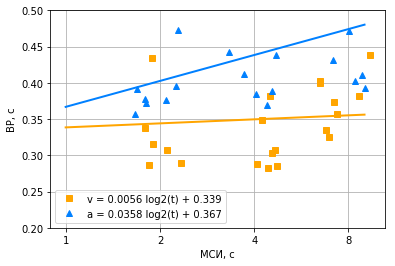

In [45]:
for mod in ['v','a']:
    color=mod=='v' and 'orange' or [0,.5,1]
    marker=mod=='v' and 's' or '^'
    bb=eval('bb'+mod.upper())
    D1=D[bb]
    
    xx=log2(arange(1,10))
    p=polyfit(D1.log2isi, D1.v, 1)
    yy=polyval(p,xx)
    
    print( 1 - sum((D1.v-polyval(p,D1.log2isi))**2)/sum((D1.v-mean(D1.v))**2))
    print(corrcoef(D1.v, D1.log2isi)[0,1]**2)

    s='{} = {:.4f} log2(t) + {:.3f}'.format(mod, p[0],p[1])
    plot(D1.log2isi, D1.v, lw=0, color=color, marker=marker, label=s)
    plot(xx,yy,color=color,lw=2);


vv=2**arange(4)
xticks(log2(vv), vv)
grid(True)
legend();
ylim([.2,.5])
xlabel('МСИ, с');
ylabel('ВР, с');

Пример кода я брала из блокнота (Task_ballate)

Я построила облако значений с линейной зависимостью. Линейный тренд для зрительных реакций проходит выше, чем для звуковых.

# Расчет коэффициента детерминации ( 𝑅2 ).

In [46]:
print( 1 - sum((D1.v-polyval(p,D1.log2isi))**2)/sum((D1.v-mean(D1.v))**2))
print(corrcoef(D1.v, D1.log2isi)[0,1]**2)

0.12946734847348507
0.12946734847348512


Используя образец, я  получила значение коэффицента детерминации для зрительных и слуховых реакций